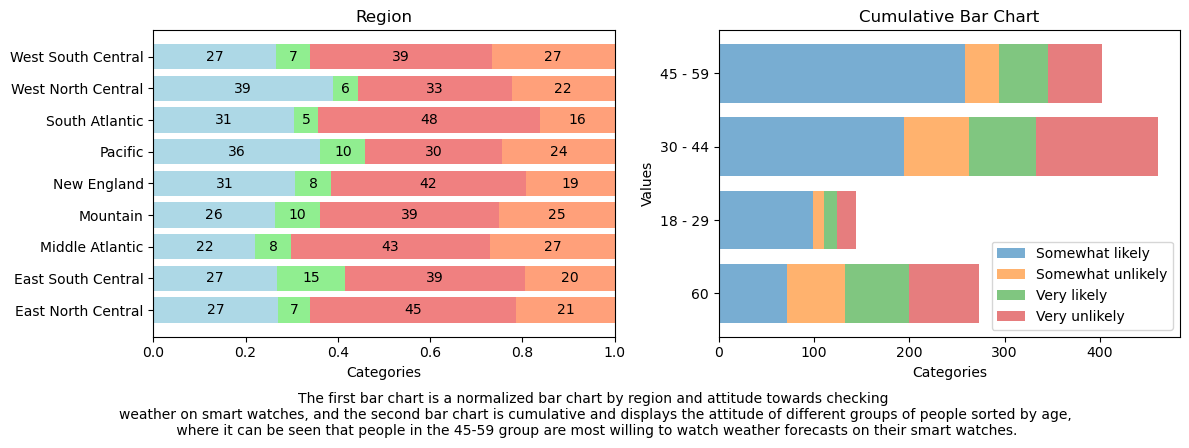

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


data1 = {
    'Category': ['East North Central', 'East South Central', 'Middle Atlantic', 'Mountain', 'New England', 'Pacific', 'South Atlantic', 'West North Central', 'West South Central'], 
    'Value1': [38, 11, 23, 19, 16, 67, 47, 21, 25],              
    'Value2': [10, 6, 8, 7, 4, 18, 8, 3, 7],             
    'Value3': [63, 16, 45, 28, 22, 55, 74, 18, 37],              
    'Value4': [30, 8, 28, 18, 10, 45, 25, 12, 25]               
}

df1 = pd.DataFrame(data1)
df1['Total'] = df1[['Value1', 'Value2', 'Value3', 'Value4']].sum(axis=1)
df1['Norm_Value1'] = df1['Value1'] / df1['Total']
df1['Norm_Value2'] = df1['Value2'] / df1['Total']
df1['Norm_Value3'] = df1['Value3'] / df1['Total']
df1['Norm_Value4'] = df1['Value4'] / df1['Total']

df1['Cumulative_Norm1'] = df1['Norm_Value1']
df1['Cumulative_Norm2'] = df1['Cumulative_Norm1'] + df1['Norm_Value2']
df1['Cumulative_Norm3'] = df1['Cumulative_Norm2'] + df1['Norm_Value3']
df1['Cumulative_Norm4'] = df1['Cumulative_Norm3'] + df1['Norm_Value4']

data2 = {
    'Category':  ['60', '18 - 29', '30 - 44', '45 - 59'],
    'Value1':  [71, 28, 95, 64],
    'Value2':  [61, 11, 68, 36],
    'Value3':  [68, 14, 71, 51],
    'Value4':  [73, 20, 128, 57]
}

df2 = pd.DataFrame(data2)
df2['Cumulative_Value1'] = df2['Value1'].cumsum()
df2['Cumulative_Value2'] = df2['Value2'].cumsum()
df2['Cumulative_Value3'] = df2['Value3'].cumsum()
df2['Cumulative_Value4'] = df2['Value4'].cumsum()


fig, axs = plt.subplots(1, 2, figsize=(12, 4))


axs[0].barh(df1['Category'], df1['Cumulative_Norm1'], label='Somewhat likely', color='lightblue')
axs[0].barh(df1['Category'], df1['Norm_Value2'], left=df1['Cumulative_Norm1'], label='Somewhat unlikely', color='lightgreen')
axs[0].barh(df1['Category'], df1['Norm_Value3'], left=df1['Cumulative_Norm2'], label='Very likely', color='lightcoral')
axs[0].barh(df1['Category'], df1['Norm_Value4'], left=df1['Cumulative_Norm3'], label='Very unlikely', color='lightsalmon')


for index, row in df1.iterrows():
    axs[0].text(row['Cumulative_Norm1'] / 2, index, str(round(row['Norm_Value1'] * 100)), va='center', ha='center')
    axs[0].text(row['Cumulative_Norm1'] + row['Norm_Value2'] / 2, index, str(round(row['Norm_Value2'] * 100)), va='center', ha='center')
    axs[0].text(row['Cumulative_Norm2'] + row['Norm_Value3'] / 2, index, str(round(row['Norm_Value3'] * 100)), va='center', ha='center')
    axs[0].text(row['Cumulative_Norm3'] + row['Norm_Value4'] / 2, index, str(round(row['Norm_Value4'] * 100)), va='center', ha='center')

axs[0].set_xlim(0, 1)
axs[0].set_title('Region')
axs[0].set_xlabel('Categories')

axs[1].barh(df2['Category'], df2['Cumulative_Value1'], label='Somewhat likely', alpha=0.6)
axs[1].barh(df2['Category'], df2['Value2'], left=df2['Cumulative_Value1'], label='Somewhat unlikely', alpha=0.6)
axs[1].barh(df2['Category'], df2['Value3'], left=df2['Cumulative_Value1'] + df2['Value2'], label='Very likely', alpha=0.6)
axs[1].barh(df2['Category'], df2['Value4'], left=df2['Cumulative_Value1'] + df2['Value2'] + df2['Value3'], label='Very unlikely', alpha=0.6)

axs[1].set_title('Cumulative Bar Chart')
axs[1].set_xlabel('Categories')
axs[1].set_ylabel('Values')
axs[1].legend()


plt.figtext(0.5, -0.05, 'The first bar chart is a normalized bar chart by region and attitude towards checking \nweather on smart watches, and the second bar chart is cumulative and displays the attitude of different groups of people sorted by age,\n where it can be seen that people in the 45-59 group are most willing to watch weather forecasts on their smart watches.', ha='center', va='center')

plt.tight_layout()
plt.show()